<a href="https://colab.research.google.com/github/Vegavru/Gr-ficas-examen_TERCER-PARCIAL/blob/main/Problema_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2:
 *Problema 3 del examen Vega Rangel*

Resuelva el problema:
$$\frac{∂\mathcal{U}}{∂t}=\frac{∂^2\mathcal{U}}{∂x^2}$$
Sujeta a las condiciones de frontera:
$$\mathcal{U}_x(0,t)=\mathcal{U}_x(1,t)=0,\hspace{1cm}t>0$$
Para:
$$\mathcal{U}(x,0)=\left\{
   \begin{array}{ll}
	-2      & \mathrm{si\ } 0<x\leq\frac{1}{2} \\
	0      & \mathrm{si\ } \frac{1}{2}<x<1
    \end{array}
	\right.,\hspace{1cm}0<x<1$$
Solución:

Suponemos una solución de la forma $\mathcal{U}(x, y) = X(x)T(t)$. Derivamos y al sustituir en la ecuación obtenemos la igualdad:
$$X(x)T'(t)=X''(x)T(t)$$
Como ni $X(x)$ ni $T(t)$ son 0, porque de serlo, también $\mathcal{U}$ lo sería, podemos dividir la última ecuación por $X(x)T(t)$ para obtener:
$$\frac{T'(t)}{T(t)}=\frac{X''(x)}{X(x)}$$
La única forma de que se cumpla la igualdad es que ambos sean iguales a la misma constante. Por conveniencia igualamos a $-\lambda$ y separamos las ecuaciones:
$$T'(t)+\lambda T(t)=0,\hspace{1cm}t>0\hspace{1cm}...(1)$$
$$X''(x)+\lambda X(x)=0,\hspace{1cm}0<x<1\hspace{1cm}...(2)$$
Para completar la separación, acotamos las condiciones de frontera. Notemos que $\mathcal{U}_x(0,t)=X'(0)T(t)=0$ para todo $t>0$. Como $T\neq 0$, se sigue que $X'(0)=0$. Analogamente, $\mathcal{U}_x(1,t)=0$ lleva a la condición $X'(1)=0$.

La ecuación (2) separada es un problema S-L. Sabemos que sus valores propios y sus funciones propias tienen la forma:
$$\lambda_n=(n\pi)^2,\hspace{1cm}X_n(x)=\cos{(n\pi x)},\hspace{1cm}n=0,1, 2, 3, ...$$
Entonces, para cada $\lambda_n$, de la ecuación (1) encontramos una componente temporal de la solución. Es decir:
$$T_n(t)=C_1e^{-n^2π^2t}$$

Combinamos las soluciones para tener
$$\mathcal{U}(x,t)=X_n(x)T_n(t)=\cos{(n\pi x)}C_1e^{-n^2π^2t},\hspace{1cm}n=0, 1, 2, 3, ...$$
Por el principio de superposición asumimos que la solución tiene la representacion en serie:
$$\mathcal{U}(x, t)=a_0+\sum_{n=1}^{\infty} a_ne^{-n^2π^2t}\cos{(n\pi x)}$$
Pero esta serie es la serie de Fourier en cosenos, donde:
$$a_0=\frac{1}{L}\int_0^L f(x)dx$$
$$a_n=\frac{2}{L}\int_0^L f(x)\cos{(\frac{n\pi x}{L})}dx$$
Finalmente la solución esta dada en términos de la serie de Fourier por la expresión:
$$\mathcal{U}(x, t)=-1-\sum_{n=1}^{\infty} \frac{4}{nπ}\sin{(\frac{n\pi}{2})}\cos{(n\pi x)}e^{-n^2π^2t}$$
Este problema modela la transferencia de calor en una barra ideal delgada, con k=1.

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *
from matplotlib import animation,rc 
from IPython.display import HTML 
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

Para empezar, graficamos la condición inicial.

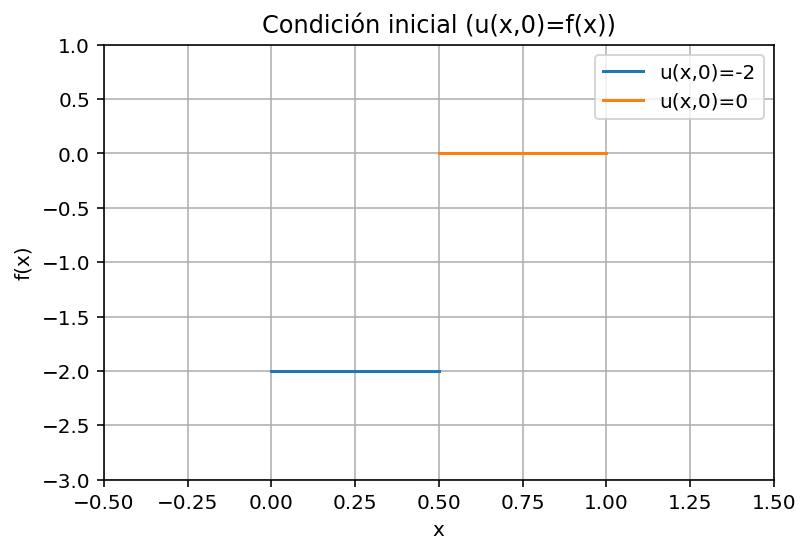

In [ ]:
x1 = np.linspace(0, 1/2)
x2 = np.linspace(1/2, 1)
f1 = [-2 for x in x1]
f2 = [0 for x in x2]
plot(x1,f1,label='u(x,0)=-2')
plot(x2,f2,label='u(x,0)=0')
plt.xlabel('x'); plt.ylabel('f(x)'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.5,1.5]),ylim([-3,1]),grid(),legend()
show()

Recordando que:  $f(x)=\left\{
   \begin{array}{ll}
	-2      & \mathrm{si\ } 0<x\leq\frac{1}{2} \\
	0      & \mathrm{si\ } \frac{1}{2}<x<1
    \end{array}
	\right.$

Ahora:


Usamos una serie de Fourier para aproximar la condición inicial $\mathcal{U}(x,0)=f(x)=\left\{
   \begin{array}{ll}
	-2      & \mathrm{si\ } 0<x\leq\frac{1}{2} \\
	0      & \mathrm{si\ } \frac{1}{2}<x<1
    \end{array}
	\right.$
  
  con una aproximación de n=12   

**Para obtener una mejora visual en la gráfica se realizara un acercamiento con respecto a los ejes del plano cartesiano*

In [ ]:
def u_0(x,N=12): 
    f = zeros(len(x))
    for n in range(1,N):
        f += 4*cos(n*pi*x)*sin(n*pi/2)/(n*pi)
    return -1-f
     

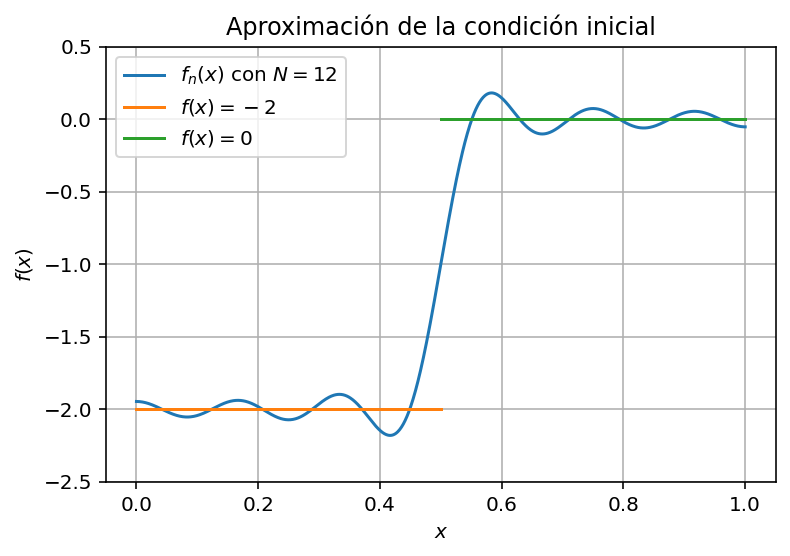

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_n(x)$ con $N=12$')
plot(x1,f1,label='$f(x)=-2$')
plot(x2,f2,label='$f(x)=0$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.05,1.05]),ylim([-2.5,0.5]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos, partiendo en multiplos de 5.

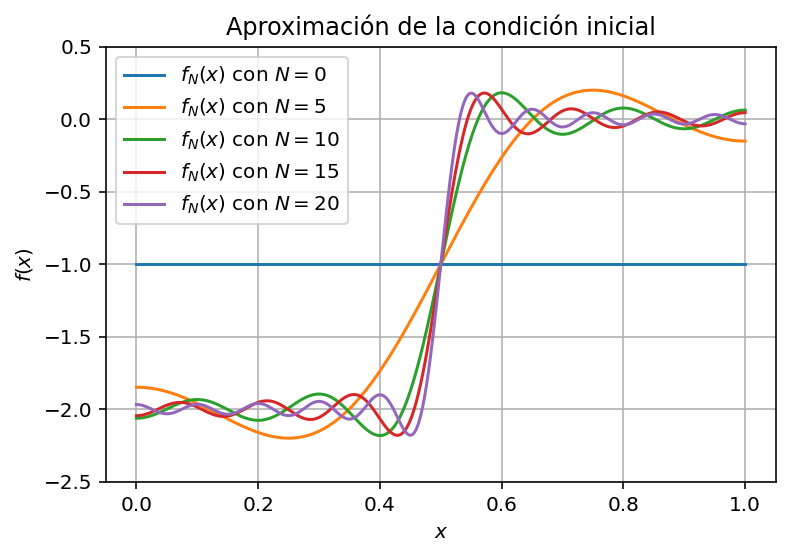

In [ ]:
for i in range(0,25,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.05,1.05]),ylim([-2.5,0.5]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [ ]:
def u_x_t(x,t,N=40):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += 4*cos(n*pi*x)*sin(n*pi/2)/(n*pi)*exp(-n**2*pi**2*t[i])
    return -1-f

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

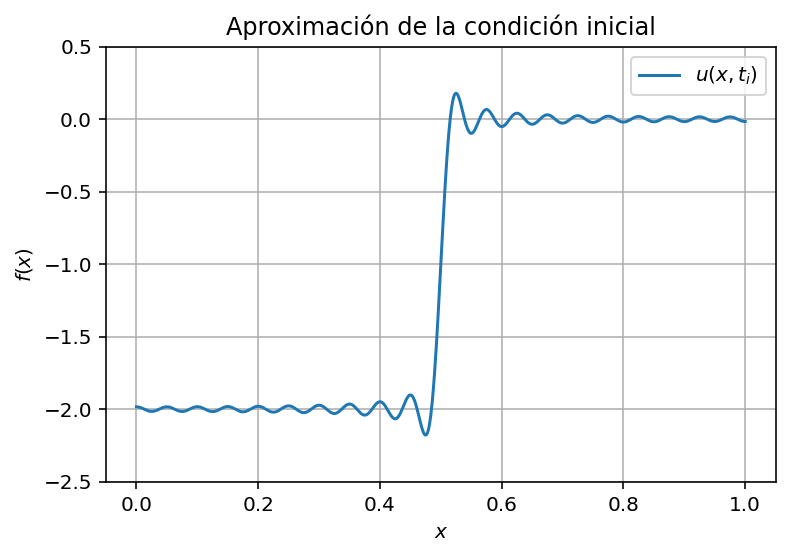

In [ ]:
plot(x,U[:,0],label='$u(x,t_i)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.05,1.05]),ylim([-2.5,0.5]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

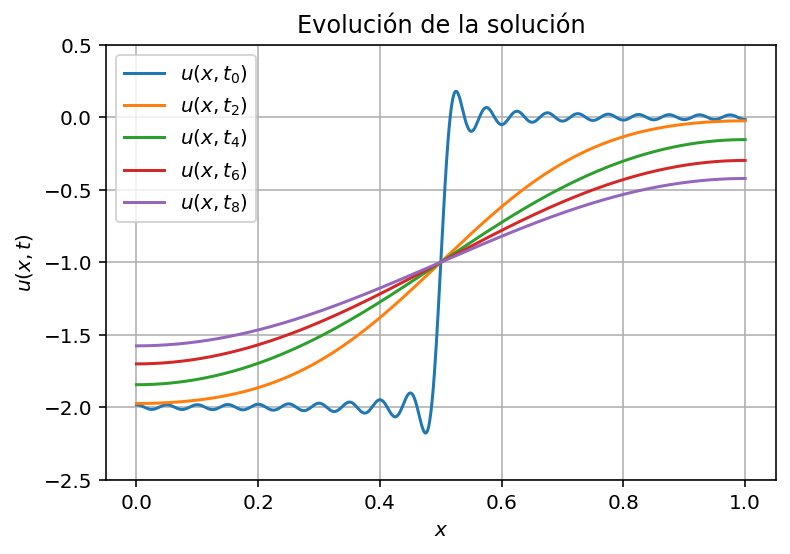

In [ ]:
for i in range(0,10,2):
    plot(x,U[:,i],label='$u(x,t_%d)$' %i)
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.05,1.05]),ylim([-2.5,0.5]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

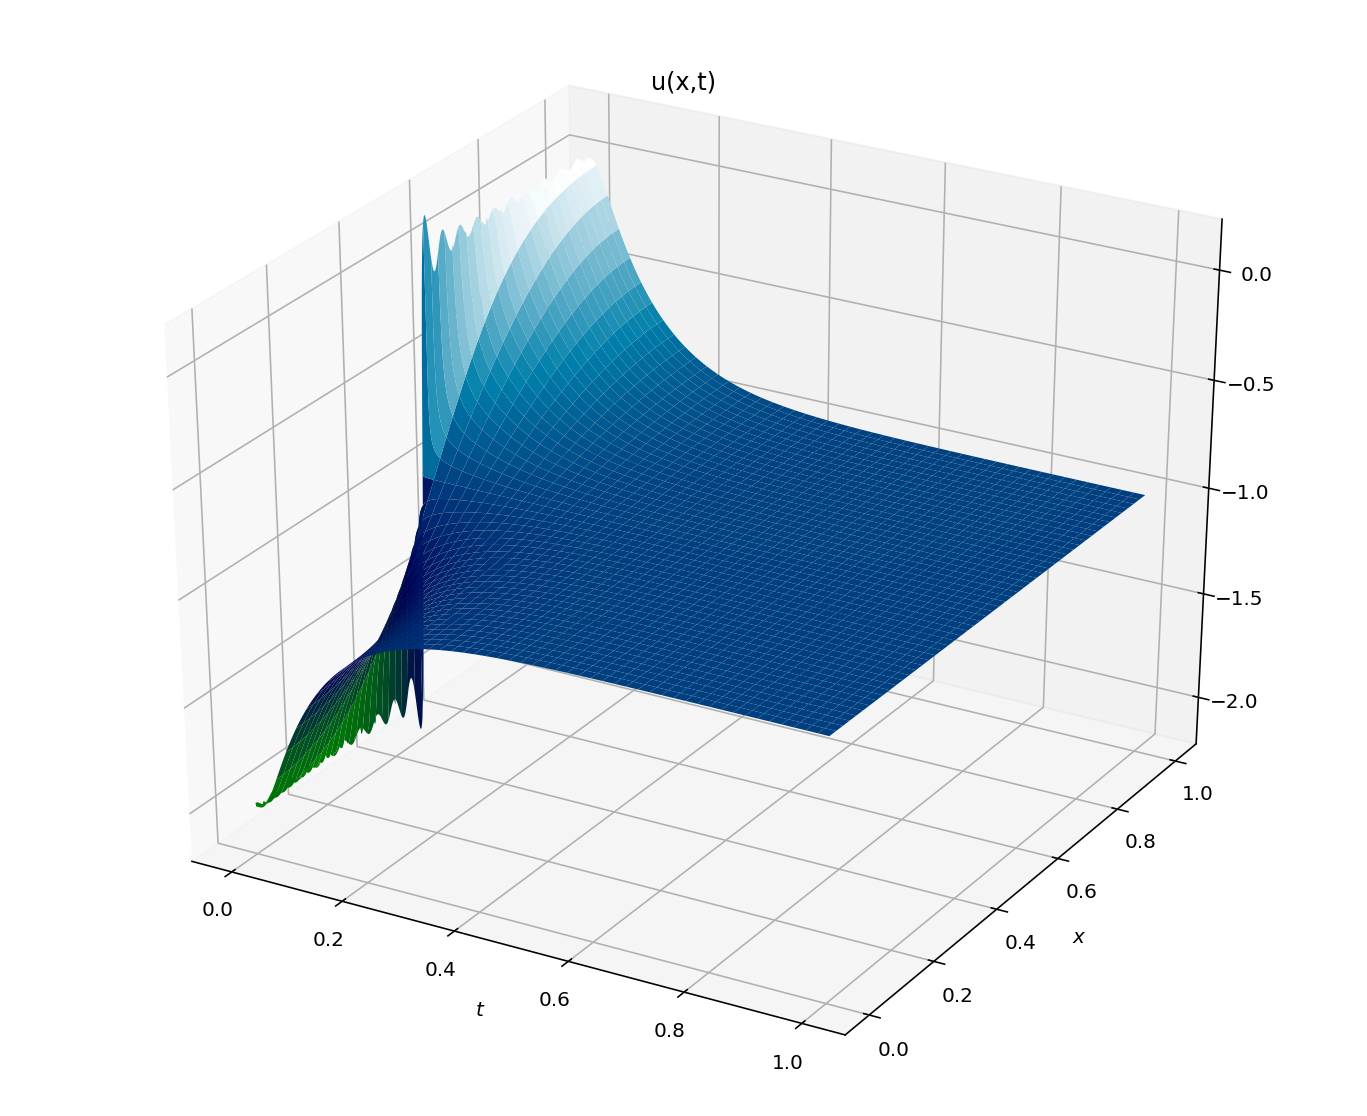

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="ocean");